## 誤差逆伝播法

重みパラメータの**勾配計算を効率的に行うための方法**。
ソフトマックス層からのネットーワークの出力と教師ラベル間の誤差を、  
これまでの入力層から出力層へのデータの流れと逆方向に流して勾配計算を各層のニューロンごとに行う（逆伝播）。  

各ニューロンでは、局所的な微分の計算を**連鎖率**という原理をもとに計算していく。  

In [1]:
# MNIST読み込み
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784) / 255.0
x_test = x_test.reshape(10000, 784) / 255.0

# encoding
t_train = to_categorical(t_train, 10)
t_test =  to_categorical(t_test, 10)

print(x_train.shape) # 学習用画像データ
print(t_train.shape) # 学習用画像データのラベル
print(x_test.shape)  # テスト用画像データ
print(t_test.shape)  # テスト用画像データのラベル

Using TensorFlow backend.


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from network.two_layer_net_ch05 import TwoLayerNet

class TrainNeuralNet:
    
    def __init__(self, iteration=10000, train_size=60000, batch_size=100, learning_rate=0.1, 
                 size={'in': 784, 'hidden1': 50, 'hidden2': 100, 'out': 10}, 
                 experiment={'init_param': False, 'func': False, 'layer': False}, 
                 x_train=[], t_train=[], x_test=[], t_test=[]):
        train_loss_list = []
        train_acc_list = []
        test_acc_list = []
        # 1エポック辺りの繰り返し数
        iter_per_epoch = max(train_size / batch_size, 1)
        
        if experiment['layer'] == False:
            network = ThreeLayerNet(size=size, experiment=experiment)
            keys = ['W1', 'b1', 'W2', 'b2', 'W3', 'b3']
        else:
            network = TwoLayerNet(input_size=size['in'], hidden_size=size['hidden1'], output_size=size['out'])
            keys = ['W1', 'b1', 'W2', 'b2']
            
        for i in range(iteration):
            # ミニバッチ取得
            batch_mask = np.random.choice(train_size, batch_size)
            x_batch = x_train[batch_mask]
            t_batch = t_train[batch_mask]

            # 勾配計算
            grad = network.gradient(x_batch, t_batch)
            
            # パラメータ更新
            for key in keys:
                network.params[key] -= learning_rate * grad[key]
            
            loss = network.loss(x_batch, t_batch)
            train_loss_list.append(loss)
            
            # 1エポックごとに認識率を計算
            if i % iter_per_epoch == 0:
                train_acc = network.accuracy(x_train, t_train)
                test_acc = network.accuracy(x_test, t_test)
                train_acc_list.append(train_acc)
                test_acc_list.append(test_acc)
                print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
                
        # グラフの描画
        markers = {'train': 'o', 'test': 's'}
        x = np.arange(len(train_acc_list))
        plt.plot(x, train_acc_list, label='train acc')
        plt.plot(x, test_acc_list, label='test acc', linestyle='--')
        plt.xlabel("epochs")
        plt.ylabel("accuracy")
        plt.ylim(0, 1.0)
        plt.legend(loc='lower right')
        plt.show()

train acc, test acc | 0.1147, 0.1123
train acc, test acc | 0.9019833333333334, 0.9023
train acc, test acc | 0.9212166666666667, 0.9224
train acc, test acc | 0.9342, 0.9346
train acc, test acc | 0.9438833333333333, 0.9408
train acc, test acc | 0.9487833333333333, 0.9463
train acc, test acc | 0.9540333333333333, 0.9519
train acc, test acc | 0.9590333333333333, 0.9543
train acc, test acc | 0.9626833333333333, 0.9577
train acc, test acc | 0.9647, 0.9577
train acc, test acc | 0.9681833333333333, 0.9617
train acc, test acc | 0.9687666666666667, 0.961
train acc, test acc | 0.97265, 0.9641
train acc, test acc | 0.9743166666666667, 0.9666
train acc, test acc | 0.97555, 0.966
train acc, test acc | 0.9778333333333333, 0.9682
train acc, test acc | 0.97775, 0.9682


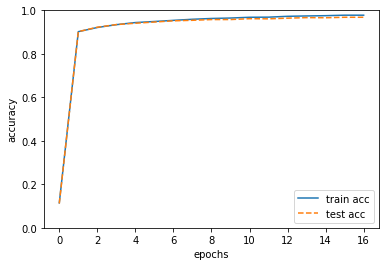

In [3]:
# 誤差逆伝播 2層NN default
# 認識精度 0.9780666666666666
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, experiment={'layer': True})

誤差逆伝播にしないと十分以上かかる処理が数十秒になるので、  
誤差逆伝播により高速化されている。

認識精度が上がっている気がするが何故だろう・・